In [189]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

In [3]:
try:
    data = pd.read_csv('data.csv', encoding='ISO-8859-1')
except Exception as e:
    print(f"Error reading the CSV file: {e}")

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.size

4335272

In [5]:
data.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [11]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
most_rep_value = data['Description'].value_counts().idxmax()

In [6]:
most_rep_value

'WHITE HANGING HEART T-LIGHT HOLDER'

In [7]:
data['Description'].fillna(most_rep_value, inplace=True)

In [8]:
data['CustomerID'].fillna(data['CustomerID'].median, inplace=True)

In [9]:
data.isna().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [11]:
data['total spending'] = data['Quantity']*data['UnitPrice']

In [12]:
data['DateYMD'] = data["InvoiceDate"].dt.date

In [13]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total spending,DateYMD
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [14]:
data[~data["CustomerID"].isna()]["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [15]:
# country vise spending
gmvcountry = data.groupby("Country")['total spending'].sum().sort_values(ascending=False).reset_index()

In [16]:
gmvcountry

,Country,total spending
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


In [17]:
gmvcountry.head()

,Country,total spending
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900


In [32]:
ax = sns.barplot(data=gmvcountry, x="Country", y="total spending")
plt.yscale("log")
ax.figure.set_size_inches(200,50)
ax.set_ylabel("Transaction Value")
plt.title('country wise total spending')

Text(0.5, 1.0, 'country wise total spending')

Text(0.5, 1.0, 'country wise total spending')

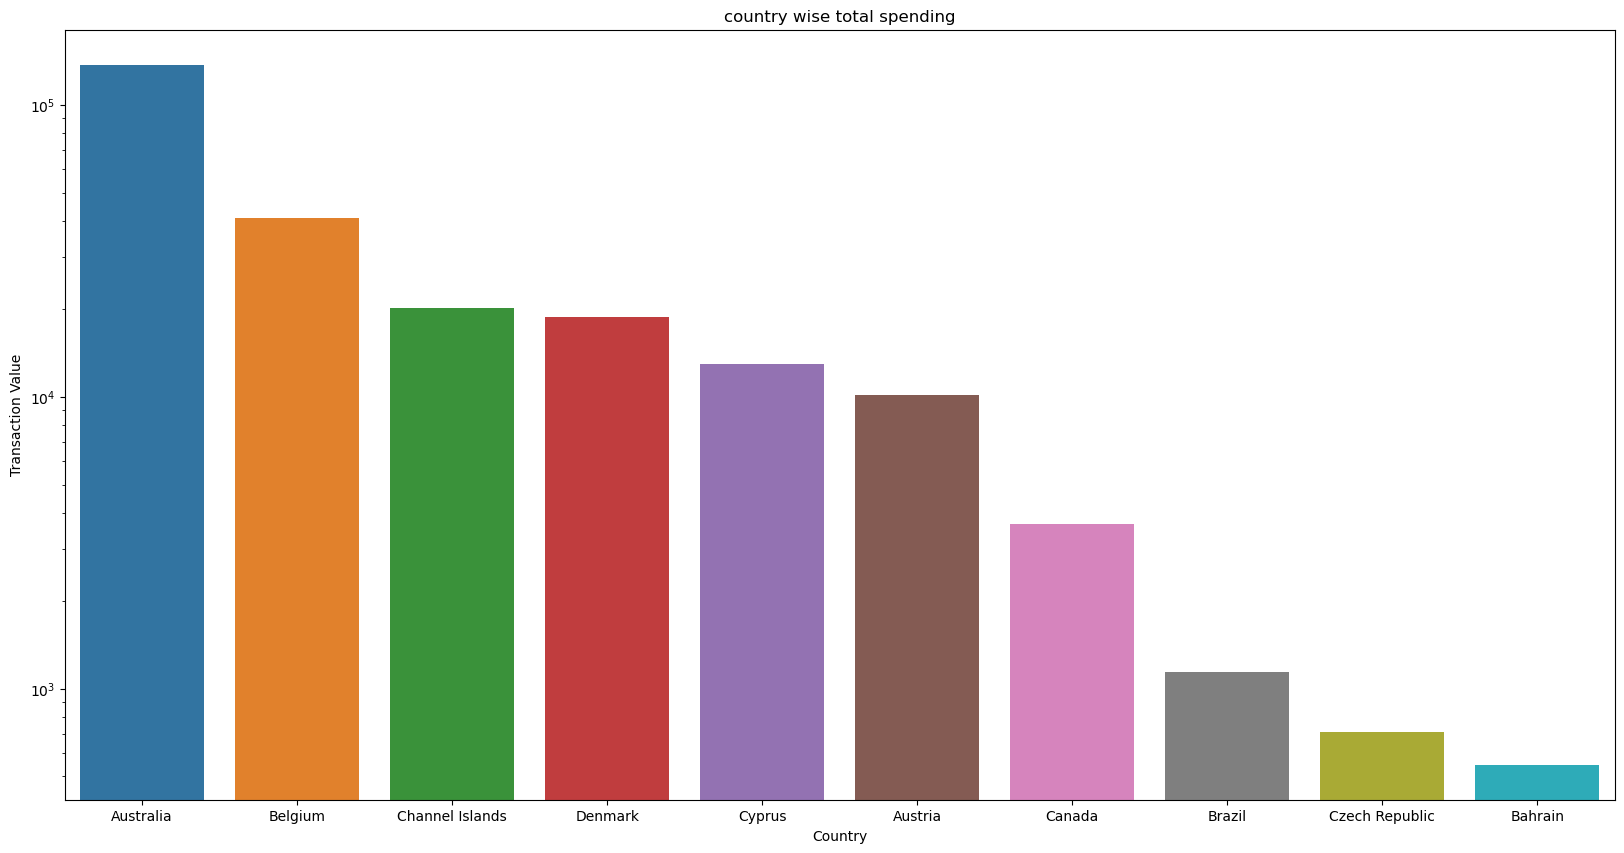

In [34]:
# top 10 countries in term of spending 
top_10_country = data.groupby("Country")['total spending'].sum().head(10).sort_values(ascending=False).reset_index()
ax = sns.barplot(data=top_10_country, x="Country", y="total spending")
plt.yscale("log")
ax.figure.set_size_inches(20,10)
ax.set_ylabel("Transaction Value")
plt.title('country wise total spending')

In [22]:
data['total spending'] = pd.to_numeric(data['total spending'], errors='coerce')
data['CustomerID'] = pd.to_numeric(data['CustomerID'], errors='coerce')

In [23]:
all_custmorid = (data.groupby("CustomerID"))['total spending'].sum().sort_values(ascending =True).reset_index()
all_custmorid

,CustomerID,total spending
0,17448.0,-4287.63
1,15369.0,-1592.49
2,14213.0,-1192.20
3,17603.0,-1165.30
4,12503.0,-1126.00
...,...,...
4367,12415.0,123725.45
4368,14911.0,132572.62
4369,17450.0,187482.17
4370,18102.0,256438.49


In [75]:
gmvcountry = data.groupby("Country")['total spending'].sum().sort_values(ascending=False).reset_index()

Text(0.5, 1.0, 'top 10 customers')

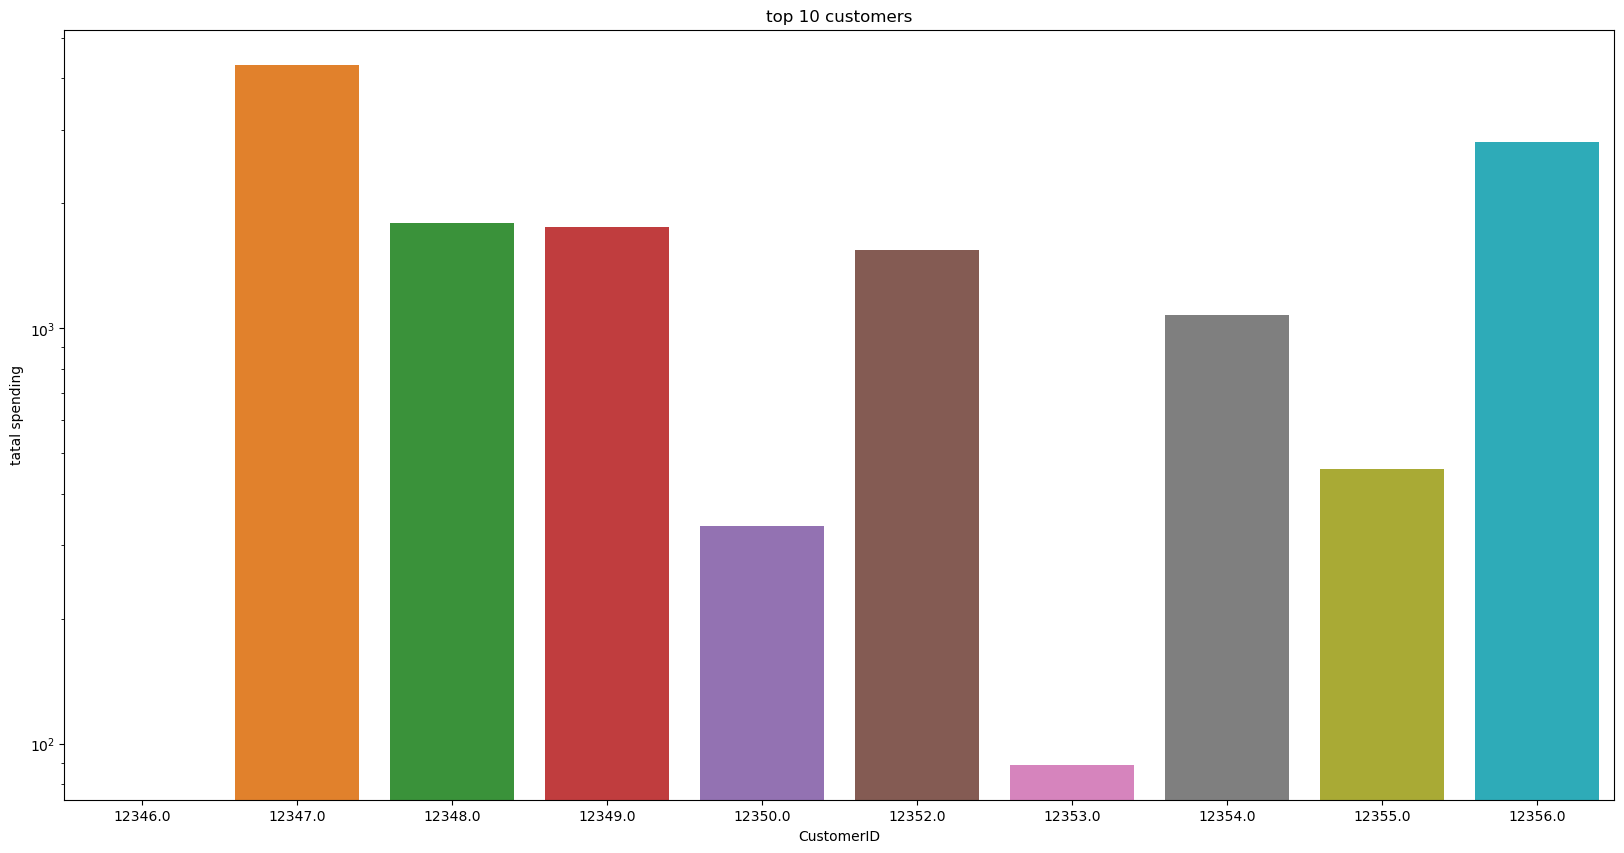

In [52]:
ax = sns.barplot(data=top_10_country, x="CustomerID", y="total spending")
plt.yscale("log")
ax.figure.set_size_inches(20,10)
ax.set_ylabel("tatal spending")
plt.title('top 10 customers')

In [65]:
# data['DateYM'] = data['InvoiceDate'].dt.to_period('M')
# data.groupby('InvoiceDate')['total spending'].sum().plot()

<Axes: xlabel='DateYMD'>

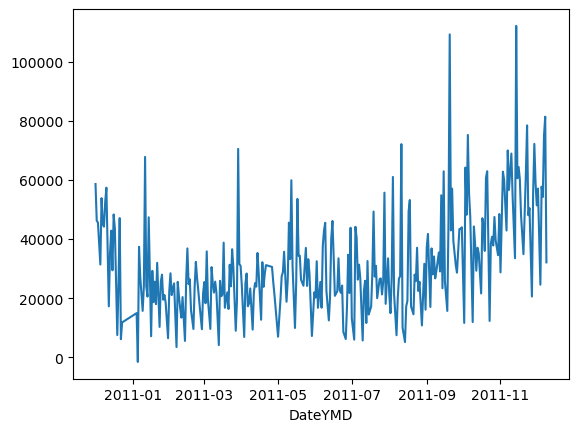

In [24]:
data['DateYMD'] = data["InvoiceDate"].dt.date
data.groupby('DateYMD')['total spending'].sum().plot()

<Axes: xlabel='DateYM'>

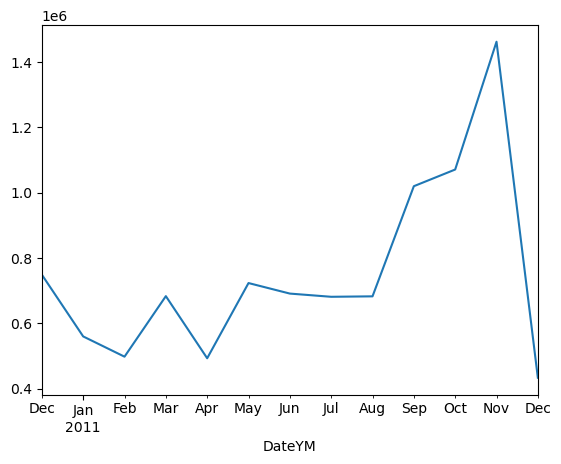

In [26]:
data['DateYM'] = data['InvoiceDate'].dt.to_period('M')
data.groupby('DateYM')['total spending'].sum().plot()

In [91]:
df = pd.DataFrame(data)

In [92]:
x = df[['Quantity', 'UnitPrice','CustomerID']]
y = df['total spending']

In [93]:
x.isna().any()

Quantity      False
UnitPrice     False
CustomerID    False
dtype: bool

In [94]:
len(x)

541909

In [95]:
len(y)

541909

In [96]:
x['CustomerID'].fillna(x['CustomerID'].median, inplace=True)
x['UnitPrice'].fillna(x['UnitPrice'].median, inplace=True)
x['Quantity'].fillna(x['Quantity'].median, inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_17228\3199175234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['CustomerID'].fillna(x['CustomerID'].median, inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_17228\3199175234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['UnitPrice'].fillna(x['UnitPrice'].median, inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_17228\3199175234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [97]:
len(x)

541909

In [98]:
len(x['CustomerID'])

541909

In [99]:
x.isna().any()

Quantity      False
UnitPrice     False
CustomerID    False
dtype: bool

In [100]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Quantity    541909 non-null  int64  
 1   UnitPrice   541909 non-null  float64
 2   CustomerID  541909 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.4 MB


In [101]:
# spliting into testinga nd training 

In [102]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
len(x_train)

433527

In [104]:
len(y_train)

433527

In [105]:
len(x_test)

108382

In [106]:
len(y_test)

108382

In [107]:
print(x_train.isna().any())
print(x_test.isna().any())
print(x_train.isna().any())
print(x_test.isna().any())

Quantity      False
UnitPrice     False
CustomerID    False
dtype: bool
Quantity      False
UnitPrice     False
CustomerID    False
dtype: bool
Quantity      False
UnitPrice     False
CustomerID    False
dtype: bool
Quantity      False
UnitPrice     False
CustomerID    False
dtype: bool


In [108]:
x.isna().any()

Quantity      False
UnitPrice     False
CustomerID    False
dtype: bool

In [109]:
# Linear regression 

In [110]:
linear_regression = LinearRegression()

In [111]:
linear_regression

LinearRegression()

In [119]:
df['CustomerID'].fillna(df['CustomerID'].median(), inplace=True)

In [120]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [149]:
linear_regression_predictions = linear_regression.predict(x_test)

In [143]:
linear_regression_predictions_train = linear_regression.predict(x_train)

In [123]:
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)

In [145]:
linear_regression_mse_train = mean_squared_error(y_train, linear_regression_predictions_train)

In [147]:
print("MSE_test:", linear_regression_mse)

MSE_test: 50446.37761499654


In [148]:
print("MSE_train:", linear_regression_mse_train)

MSE_train: 21372.072123220143


In [151]:
linear_regression_r2_test = r2_score(y_test, linear_regression_predictions)

In [153]:
linear_regression_r2_train = r2_score(y_train, linear_regression_predictions_train)

In [152]:
print("R2 Score test:", linear_regression_r2_test)

R2 Score test: 0.8463472587523102


In [154]:
print("R2 Score train:", linear_regression_r2_train)

R2 Score train: 0.7803326019723847


In [ ]:
# since our function is working preety well on testing data so no need for k fold

In [127]:
linear_regression_predictions

array([42.6223235 ,  8.1043525 , 12.93817572, ..., 18.15708992,
       43.34096786,  8.38648322])

In [132]:
y_test_arr = np.array(y_test)

In [133]:
y_test_arr

array([20.4 , 27.8 ,  2.6 , ..., 13.2 ,  4.56,  0.39])

In [155]:
decission_regression = DecisionTreeRegressor(random_state=42)

In [236]:
decission_regression

DecisionTreeRegressor(random_state=42)

In [156]:
decission_regression.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [164]:
dt_predictions_test = decission_regression.predict(x_test)

In [165]:
dt_predictions_train = decission_regression.predict(x_train)

In [168]:
dt_mse_test = mean_squared_error(y_test, dt_predictions_test)

In [169]:
dt_mse_train = mean_squared_error(y_train, dt_predictions_train)

In [170]:
print("Mean Squared Error in test:", dt_mse_test)
print("Mean Squared Error in train:", dt_mse_train)

Mean Squared Error in test: 489580.6239036954
Mean Squared Error in train: 80525.12881314656


In [171]:
dt_r2_test = r2_score(y_test, dt_predictions_test)

In [172]:
dt_r2_train = r2_score(y_train, dt_predictions_train)

In [175]:
print("R^2 Score test:", dt_r2_test)
print("R^2 Score train:", dt_r2_train)

R^2 Score test: -0.491195373802108
R^2 Score train: 0.17234298011730254


In [178]:
dt_predictions_test

array([31.02784193,  6.49048286,  6.49048286, ..., 13.78086211,
       31.02784193,  6.49048286])

In [182]:
y_test_array = np.array(y_test)
y_test_array

array([20.4 , 27.8 ,  2.6 , ..., 13.2 ,  4.56,  0.39])

In [190]:
# here we will have to aplly K-fold method 
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [191]:
train_scores = []
test_scores = []

In [192]:
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    decission_regression.fit(x_train, y_train)
    
    train_score = decission_regression.score(x_train, y_train)
    train_scores.append(train_score)
    
    test_score = decission_regression.score(x_test, y_test)
    test_scores.append(test_score)

In [200]:
test_scores

[-0.3814990799033491,
 0.09423502131612105,
 0.35612413403593446,
 -0.3217041187654517,
 0.9489777543848154,
 0.968152042382975,
 0.9845737339039357,
 0.8031117089805684,
 0.7086162691958902,
 0.9879493316452567]

In [195]:
train_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [201]:
print(f'Mean training accuracy: {np.mean(train_scores):.2f}')
print(f'Mean test accuracy: {np.mean(test_scores)}')

Mean training accuracy: 1.00
Mean test accuracy: 0.5148536797176695


In [202]:
# random forest regressor 

In [203]:
random_forest_regression = RandomForestRegressor(random_state=42)

In [204]:
random_forest_regression

RandomForestRegressor(random_state=42)

In [206]:
random_forest_regression.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [216]:
rf_predictions_test = random_forest_regression.predict(x_test)

In [217]:
rf_predictions_train = random_forest_regression.predict(x_train)

In [218]:
rf_mse_test = mean_squared_error(y_test, rf_predictions_test)

In [219]:
rf_mse_train = mean_squared_error(y_train, rf_predictions_train)

In [225]:
rf_predictions_test

array([ 15.3 ,   9.9 ,  14.85, ...,  30.  , 214.8 ,  15.  ])

In [231]:
y_test_array = np.array(y_test)
y_test_array

array([ 15.3 ,   9.9 ,  14.85, ...,  30.  , 214.8 ,  15.  ])

In [220]:
print("Mean Squared Error in train:", rf_mse_train)

Mean Squared Error in train: 13682.094431816253


In [221]:
print("Mean Squared Error in test:", rf_mse_test)

Mean Squared Error in test: 242.60421838824124


In [232]:
rf_r2_test = r2_score(y_test, rf_predictions_test)

In [233]:
rf_r2_train = r2_score(y_train, rf_predictions_train)

In [234]:
print("R^2 Score_test:", rf_r2_test)

R^2 Score_test: 0.9843118032325499


In [235]:
print("R^2 Score_train:", rf_r2_test)

R^2 Score_train: 0.9843118032325499


In [ ]:
# 